In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
cd /content/drive/MyDrive/Machine learning 2024/Notebooks - Machine Learning/DBSCAN & Hierarchical clustering & kmeans

/content/drive/MyDrive/Machine learning 2024/Notebooks - Machine Learning/DBSCAN & Hierarchical clustering & kmeans


In [36]:
ls

'Clustering techniques.ipynb'   Mall_Customers.csv


In [37]:
df=pd.read_csv("Mall_Customers.csv")

In [38]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [40]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [41]:
df.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'SpendScore'},inplace=True)

In [42]:
df.head()

,CustomerID,Gender,Age,Income,SpendScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [43]:
df=df.drop(['CustomerID'],axis=1)

In [44]:
df.head()

,Gender,Age,Income,SpendScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [45]:
df['Gender'].value_counts()

,count
Gender,
Female,112
Male,88


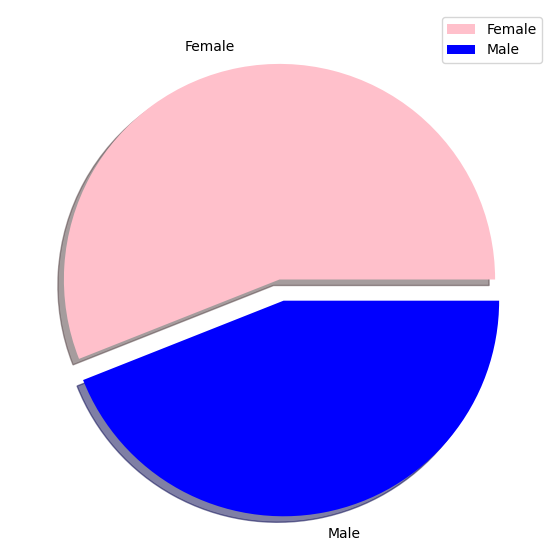

In [46]:
plt.figure(figsize=(7,7))
size=df['Gender'].value_counts()
label=['Female','Male']
color=['Pink','Blue']
explode=[0,0.1]
plt.pie(size,explode=explode,labels=label,colors=color,shadow=True)
plt.legend()
plt.show()

In [47]:
size

,count
Gender,
Female,112
Male,88


**From the diagram we can say that females are more visiting to mall than males**

Text(0, 0.5, 'Spendscore')

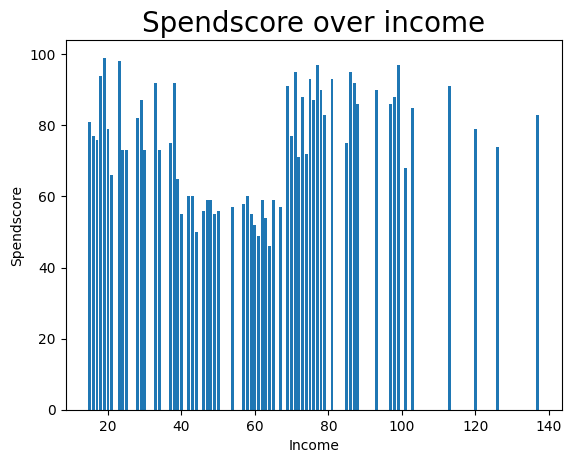

In [48]:
plt.bar(df['Income'],df['SpendScore'])
plt.title('Spendscore over income',fontsize=20)
plt.xlabel('Income')
plt.ylabel('Spendscore')

**Peoples of income in the range of 20k-40k and 70k-100k have the highest spend score**

# **Density Based Spacial Clustering of Applications with noise (DBSCAN)**

**We are going to use the DBSCAN  for algorithm for the purpose of clustering. It is an unsupervised machine learning algorithm. It is used for clusters of high density. It automatically predicts the outliers and removes it. It is better than hierarchical and k-means clustering algorithm. It makes the clusters based on the parameters like epsilon,min points and noise.It separately predicts the core points, border points and outliers efficiently.**

In [49]:
df.head()

,Gender,Age,Income,SpendScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [50]:
x=df.iloc[:,[2,3]]

In [51]:
print(type(x))
print(x[:5])

<class 'pandas.core.frame.DataFrame'>
   Income  SpendScore
0      15          39
1      15          81
2      16           6
3      16          77
4      17          40


In [52]:
x=x.values

In [53]:
print(type(x))
print(x[:5])

<class 'numpy.ndarray'>
[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


In [54]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=5,min_samples=6,metric='euclidean')

In [55]:
model=db.fit(x)

In [56]:
label=model.labels_

In [57]:
label

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1, -1,  1, -1, -1,  2,  1,  2,  1, -1,  1,  2,  3,
        2,  1,  2,  1,  2,  3, -1,  3, -1, -1, -1,  1, -1,  3, -1,  3, -1,
        1, -1,  3, -1,  1, -1,  1, -1,  3, -1,  3, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [58]:
from sklearn import metrics

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 4


In [59]:
y_means = db.fit_predict(x)

In [60]:
y_means == 0, 0

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True,  True,  True,  True,  True, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False, False, False,
      

**Hint**

x[y_means == i, 0] and x[y_means == i, 1] select the x and y coordinates of points in the i-th cluster.

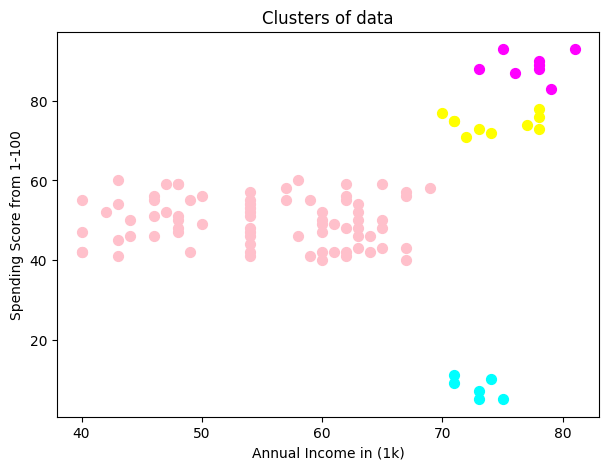

In [61]:
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'violet')
plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending Score from 1-100')
plt.title('Clusters of data')
plt.show()



In [62]:
# Calculate Silhouette Score for DBSCAN
silhouette_score_dbscan = metrics.silhouette_score(x, y_means)
print("Silhouette Score for DBSCAN: ", silhouette_score_dbscan)


Silhouette Score for DBSCAN:  0.06353533083993718


In [63]:
# Automatic code for selecting the best value of min samples and epslon based on siheoute score

import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

# Range of epsilon and min_samples to explore
eps_range = np.arange(2, 15, 1)
min_samples_range = np.arange(2, 15, 1)

best_score = -1
best_eps = None
best_min_samples = None

for eps in eps_range:
  for min_samples in min_samples_range:
    db = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
    model = db.fit(x)
    labels = model.labels_

    # Ignore cases where all points are noise
    if len(set(labels)) > 1:
      silhouette_score = metrics.silhouette_score(x, labels)
      if silhouette_score > best_score:
        best_score = silhouette_score
        best_eps = eps
        best_min_samples = min_samples

print("Best Silhouette Score:", best_score)
print("Best Epsilon:", best_eps)
print("Best Min Samples:", best_min_samples)


Best Silhouette Score: 0.475053701963407
Best Epsilon: 9
Best Min Samples: 3


# HIERARCHICAL CLUSTERING

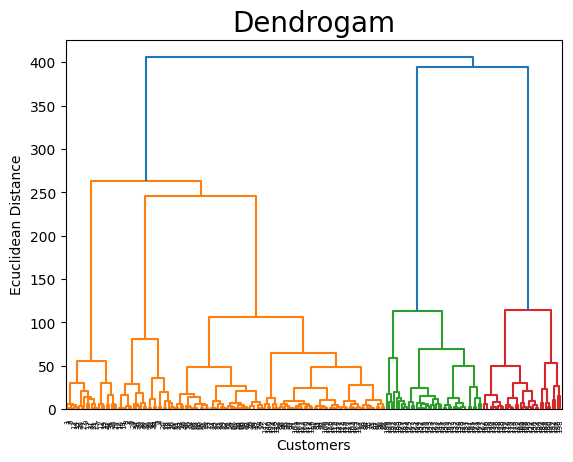

In [ ]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

**sch.linkage(x, method='ward')** computes the linkage matrix using the Ward variance minimization algorithm.
x is the dataset you are clustering.

**method='ward'** specifies that the Ward method should be used, which minimizes the variance of the clusters being merged. This is a popular method for hierarchical clustering.

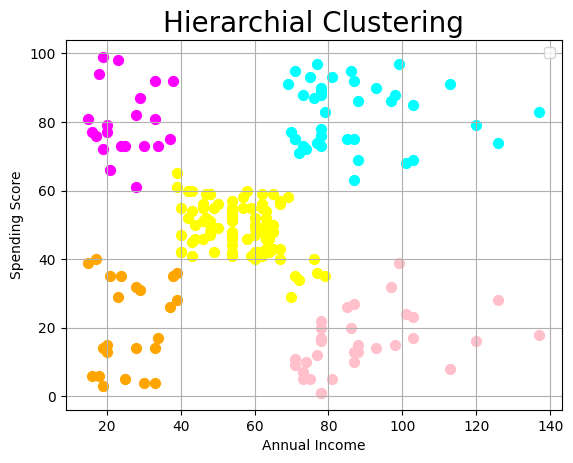

In [64]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_hc == 5, 0], x[y_hc == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_hc == 6, 0], x[y_hc == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_hc == 7, 0], x[y_hc == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_hc == 8, 0], x[y_hc == 8, 1], s = 50, c = 'violet')


plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [65]:
# Calculate Silhouette Score for Hierarchical Clustering
silhouette_score_hc = metrics.silhouette_score(x, y_hc)
print("Silhouette Score for Hierarchical Clustering: ", silhouette_score_hc)


Silhouette Score for Hierarchical Clustering:  0.5529945955148897


In [66]:
# Need to make automatic code for selecting the best value n_clusters based on silheoute score

import numpy as np
# Try different numbers of clusters and calculate Silhouette Score
silhouette_scores = []
for n_clusters in range(2, 15):
  hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
  y_hc = hc.fit_predict(x)
  silhouette_scores.append(metrics.silhouette_score(x, y_hc))

In [67]:
silhouette_scores

[0.36706444723912895,
 0.4618340266628975,
 0.4916598193892782,
 0.5529945955148897,
 0.5380208285578872,
 0.519904611908887,
 0.4326286245782246,
 0.43892545672004507,
 0.4342656377895271,
 0.4235291810694601,
 0.4292221461834499,
 0.4115159018886883,
 0.4116644433478917]

In [68]:
# Find the optimal number of clusters
optimal_n_clusters = np.argmax(silhouette_scores) + 2  # Add 2 because range starts from 2
print("Optimal number of clusters:", optimal_n_clusters)

# Perform Hierarchical Clustering with the optimal number of clusters
hc = AgglomerativeClustering(n_clusters=optimal_n_clusters, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(x)

# Calculate Silhouette Score for Hierarchical Clustering
silhouette_score_hc = metrics.silhouette_score(x, y_hc)
print("Silhouette Score for Hierarchical Clustering: ", silhouette_score_hc)


Optimal number of clusters: 5
Silhouette Score for Hierarchical Clustering:  0.5529945955148897


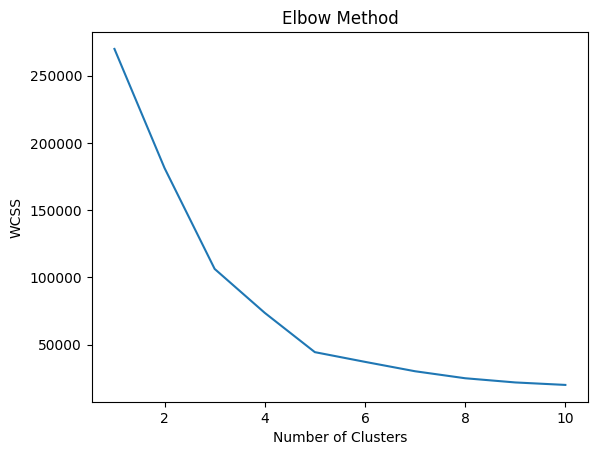

In [69]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Determine optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


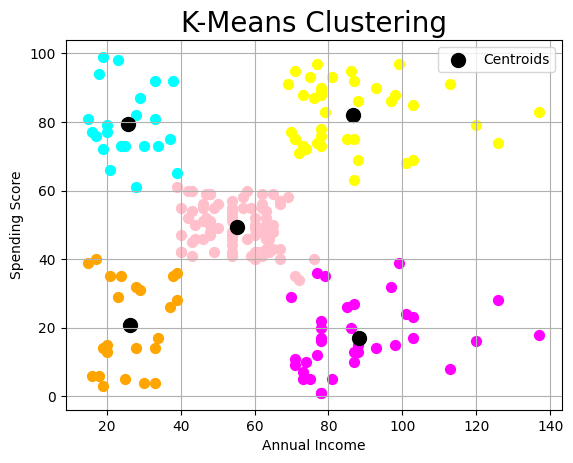

Silhouette Score for K-Means:  0.553931997444648


In [70]:
# Based on the Elbow method, choose the optimal number of clusters (let's say 5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x)

# Visualize the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=50, c='pink')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=50, c='yellow')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=50, c='cyan')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s=50, c='magenta')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s=50, c='orange')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')

plt.title('K-Means Clustering', fontsize=20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

# Calculate Silhouette Score for K-Means
silhouette_score_kmeans = metrics.silhouette_score(x, y_kmeans)
print("Silhouette Score for K-Means: ", silhouette_score_kmeans)

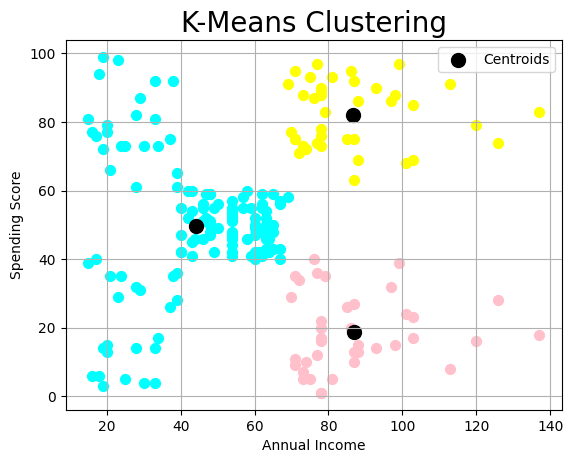

Silhouette Score for K-Means:  0.46761358158775435


In [71]:
# Based on the Elbow method, choose the optimal number of clusters (let's say 5)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x)

# Visualize the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=50, c='pink')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=50, c='yellow')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=50, c='cyan')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s=50, c='magenta')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s=50, c='orange')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')

plt.title('K-Means Clustering', fontsize=20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

# Calculate Silhouette Score for K-Means
silhouette_score_kmeans = metrics.silhouette_score(x, y_kmeans)
print("Silhouette Score for K-Means: ", silhouette_score_kmeans)